## xAI

In [1]:
from src.models.dr_model import DRLightning
import torch

model = DRLightning.load_from_checkpoint("./training_16012026/checkpoints/best-epoch=74-val_acc=0.786.ckpt")
model.eval()

target_layer = model.model.features[-2]  # last Conv2d before pooling

In [2]:
import torch
from src.utils.xAI import ModelInspector
from src.datamodules.dr_module import RDDatamodule

model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

datamodule = RDDatamodule()
datamodule.setup(stage="test")

test_loader = datamodule.test_dataloader()

target_layer = model.model.features[-2]

inspector = ModelInspector(
    model=model,
    target_layer=target_layer,
    device=device,
)

x, y = next(iter(test_loader))
x = x[:1].to(device)
target_class = y[0].item()

saliency = inspector.explain(
    x,
    method="saliency",
    target=target_class,
)

gradcampp = inspector.explain(
    x,
    method="gradcam",
    target=target_class,
)



TRAIN class distribution:
  Class 0: 1263
  Class 1: 259
  Class 2: 699
  Class 3: 135
  Class 4: 207

VAL class distribution:
  Class 0: 361
  Class 1: 74
  Class 2: 200
  Class 3: 39
  Class 4: 58

TEST class distribution:
  Class 0: 181
  Class 1: 37
  Class 2: 100
  Class 3: 19
  Class 4: 30

Total samples
 Train: 2563 | Val: 732 | Test: 367


/home/jrosa/AGH_FILES/PAOM_retinapatia/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jrosa/AGH_FILES/PAOM_retinapatia/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


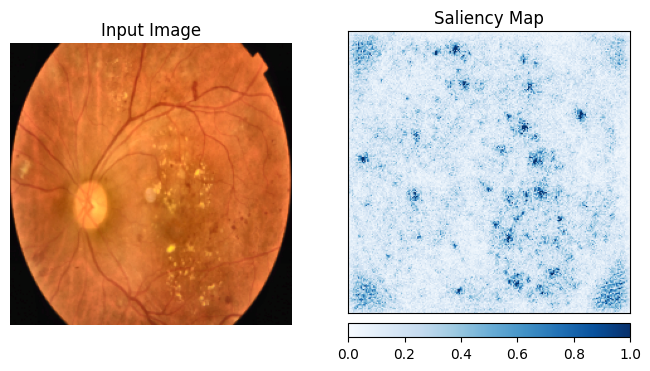

<Figure size 640x480 with 0 Axes>

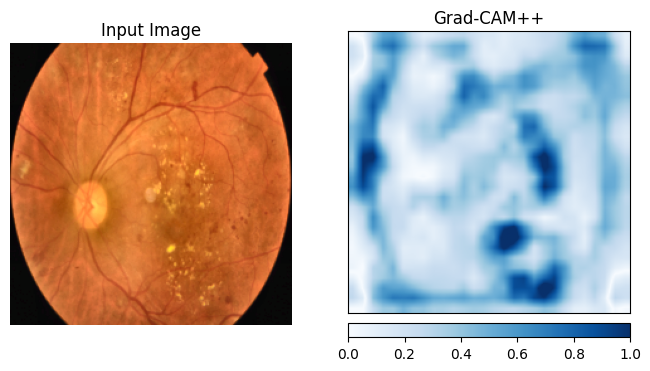

<Figure size 640x480 with 0 Axes>

In [3]:
inspector.visualize_side_by_side(saliency[0], x[0], title="Saliency Map")
inspector.visualize_side_by_side(gradcampp[0], x[0], title="Grad-CAM++")


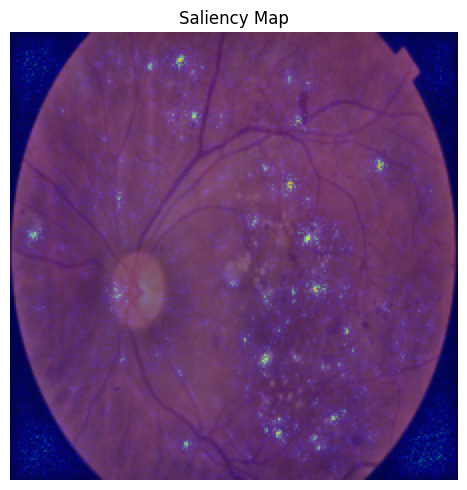

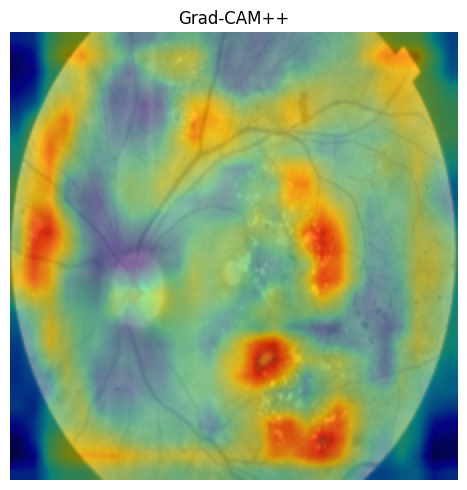

In [4]:
inspector.visualize_overlay(saliency[0], x[0], title="Saliency Map")
inspector.visualize_overlay(gradcampp[0], x[0], title="Grad-CAM++")